In [513]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler,StandardScaler, Normalizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


## 設定路徑

In [514]:
#設定路徑
dir_data = r"C:\Users\User\Google 雲端硬碟\Darren Life Learning Log\Python_DS\Dataset\Data Science London Scikit-learn\\"
f_train = os.path.join(dir_data,"train.csv")
print("f_train root : ",f_train)
f_trainY = os.path.join(dir_data,"trainLabels.csv")
print("f_trainY root : ",f_train)
f_test = os.path.join(dir_data,"test.csv")
print("f_test root : ",f_test)

f_train root :  C:\Users\User\Google 雲端硬碟\Darren Life Learning Log\Python_DS\Dataset\Data Science London Scikit-learn\\train.csv
f_trainY root :  C:\Users\User\Google 雲端硬碟\Darren Life Learning Log\Python_DS\Dataset\Data Science London Scikit-learn\\train.csv
f_test root :  C:\Users\User\Google 雲端硬碟\Darren Life Learning Log\Python_DS\Dataset\Data Science London Scikit-learn\\test.csv


## 讀取路徑

In [515]:
app_train = pd.read_csv(f_train,header=None)
print(app_train.head(5))
print("app_train shape : ",app_train.shape)
app_train_Y = pd.read_csv(f_trainY,header=None)
print(app_train_Y.head(5))
print("app_train_Y shape : ",app_train_Y.shape)
app_test = pd.read_csv(f_test,header=None)
print(app_test.head(5))
print("app_test shape : ",app_test.shape)


         0         1         2         3         4         5         6   \
0  0.299403 -1.226624  1.498425 -1.176150  5.289853  0.208297  2.404498   
1 -1.174176  0.332157  0.949919 -1.285328  2.199061 -0.151268 -0.427039   
2  1.192222 -0.414371  0.067054 -2.233568  3.658881  0.089007  0.203439   
3  1.573270 -0.580318 -0.866332 -0.603812  3.125716  0.870321 -0.161992   
4 -0.613071 -0.644204  1.112558 -0.032397  3.490142 -0.011935  1.443521   

         7         8         9   ...        30        31        32        33  \
0  1.594506 -0.051608  0.663234  ... -0.850465 -0.622990 -1.833057  0.293024   
1  2.619246 -0.765884 -0.093780  ... -0.819750  0.012037  2.038836  0.468579   
2 -4.219054 -1.184919 -1.240310  ... -0.604501  0.750054 -3.360521  0.856988   
3  4.499666  1.038741 -1.092716  ...  1.022959  1.275598 -3.480110 -1.065252   
4 -4.290282 -1.761308  0.807652  ...  0.513906 -1.803473  0.518579 -0.205029   

         34        35        36        37        38        39  
0  3

## 檢視個欄位資料型態狀態

In [516]:
app_train.dtypes.value_counts()

float64    40
dtype: int64

## 檢視個欄位資料分布狀況

缺失值佔數據0.0%


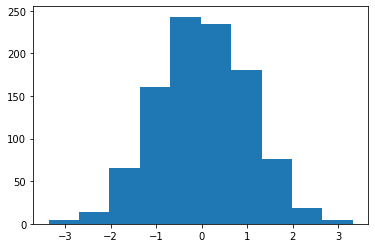

缺失值佔數據0.0%


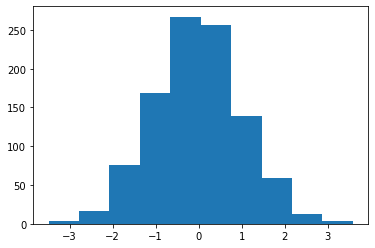

缺失值佔數據0.0%


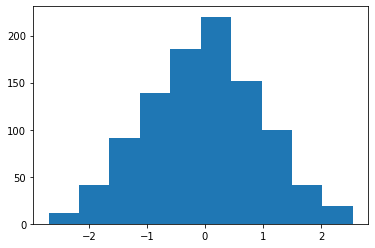

缺失值佔數據0.0%


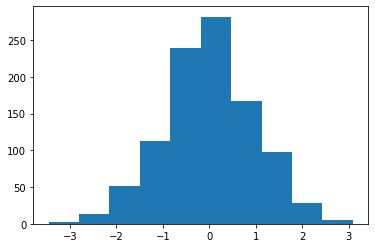

缺失值佔數據0.0%


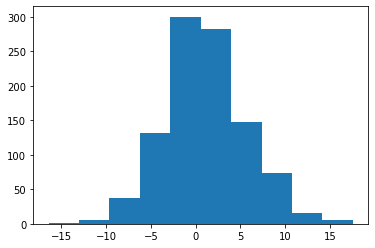

缺失值佔數據0.0%


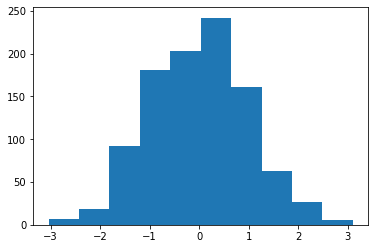

缺失值佔數據0.0%


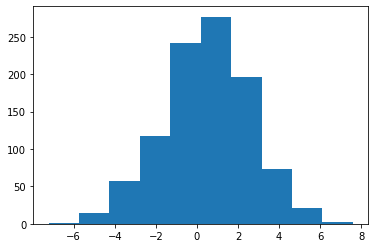

缺失值佔數據0.0%


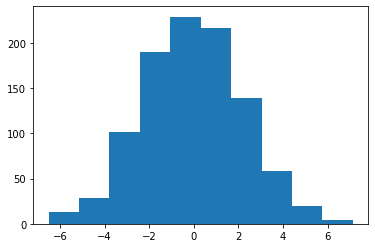

缺失值佔數據0.0%


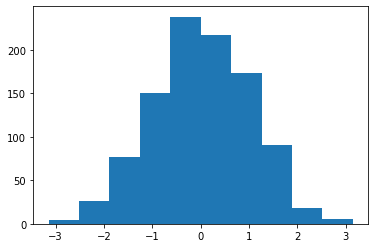

缺失值佔數據0.0%


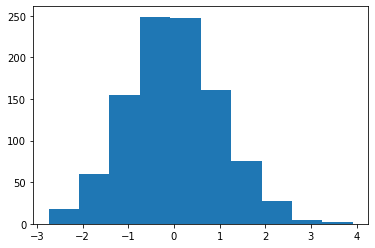

缺失值佔數據0.0%


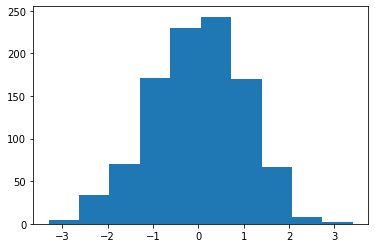

缺失值佔數據0.0%


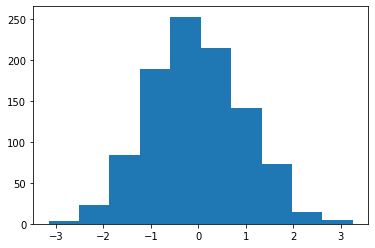

缺失值佔數據0.0%


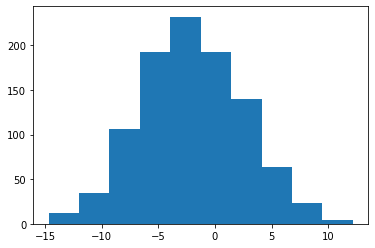

缺失值佔數據0.0%


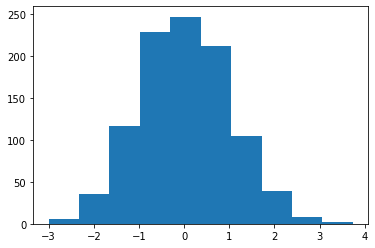

缺失值佔數據0.0%


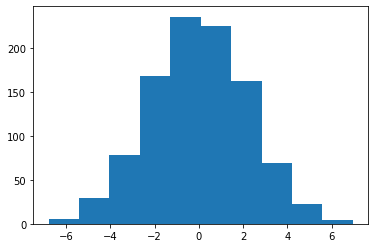

缺失值佔數據0.0%


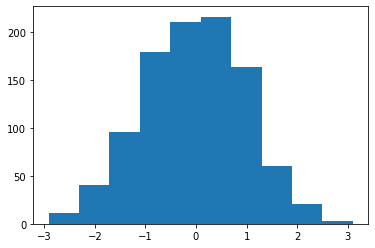

缺失值佔數據0.0%


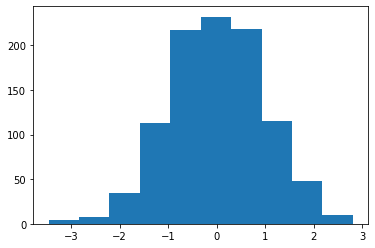

缺失值佔數據0.0%


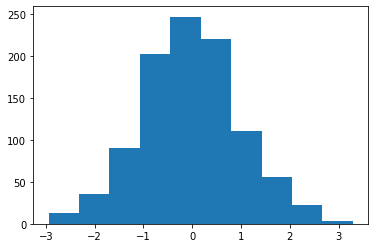

缺失值佔數據0.0%


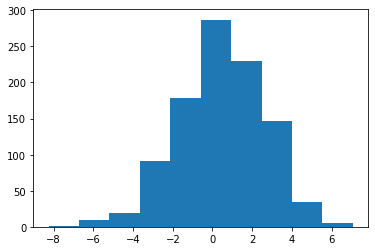

缺失值佔數據0.0%


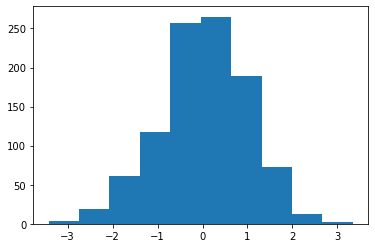

缺失值佔數據0.0%


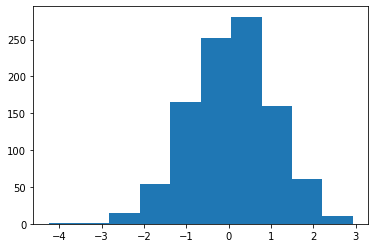

缺失值佔數據0.0%


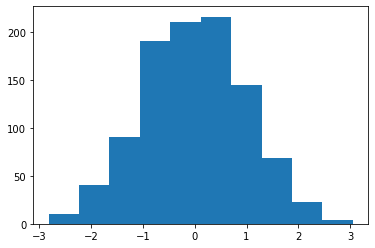

缺失值佔數據0.0%


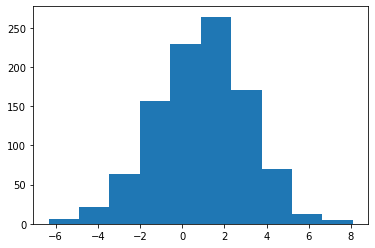

缺失值佔數據0.0%


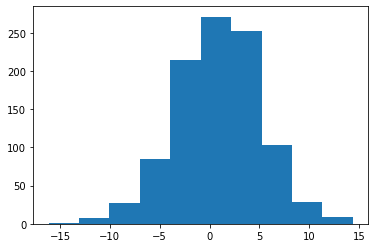

缺失值佔數據0.0%


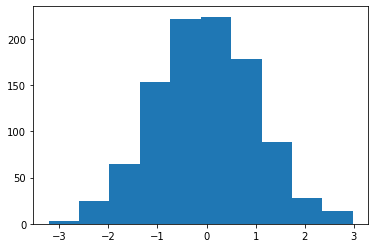

缺失值佔數據0.0%


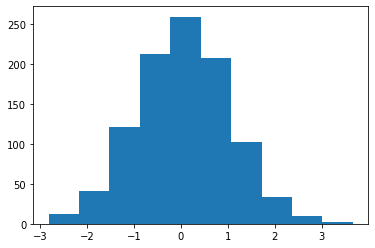

缺失值佔數據0.0%


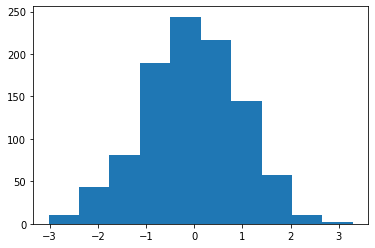

缺失值佔數據0.0%


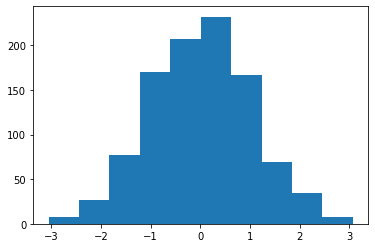

缺失值佔數據0.0%


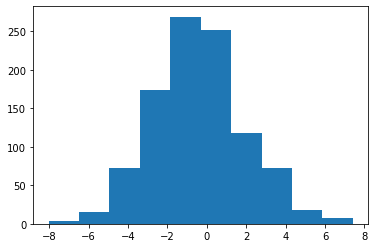

缺失值佔數據0.0%


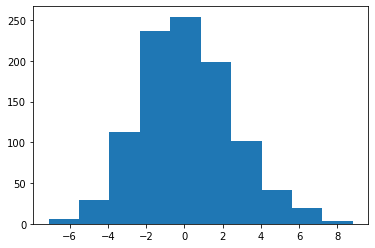

缺失值佔數據0.0%


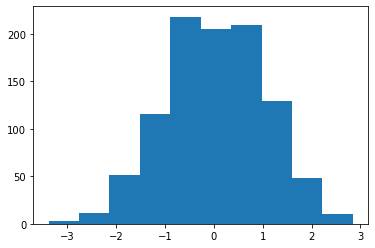

缺失值佔數據0.0%


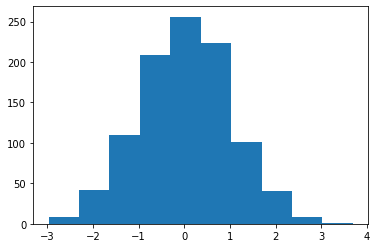

缺失值佔數據0.0%


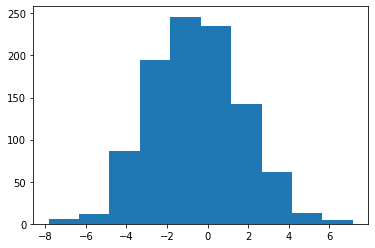

缺失值佔數據0.0%


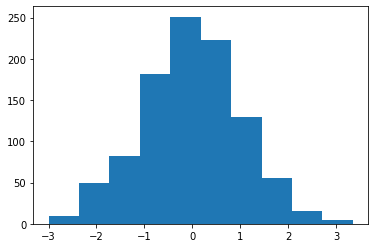

缺失值佔數據0.0%


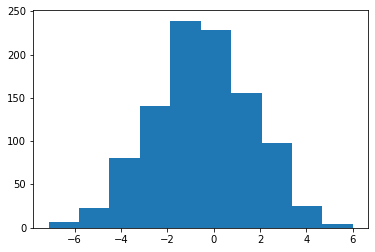

缺失值佔數據0.0%


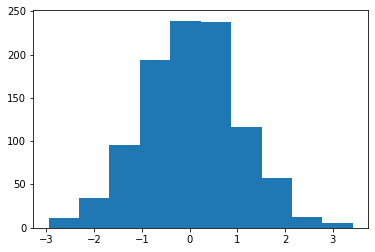

缺失值佔數據0.0%


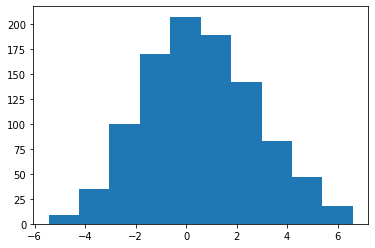

缺失值佔數據0.0%


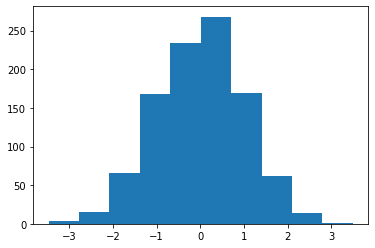

缺失值佔數據0.0%


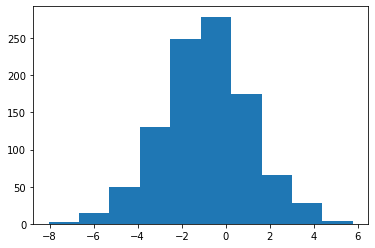

缺失值佔數據0.0%


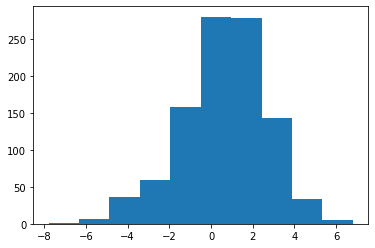

In [517]:
import matplotlib.pyplot as plt
row_num = app_train.shape[0]
for cn in app_train.columns:
    print("缺失值佔數據{}%".format(app_train[app_train[1]==np.nan][1].count()/row_num))
    plt.hist(app_train[cn])
    plt.show()

## 合併train與test

In [518]:
df = pd.concat([app_train,app_test])
df.head()
print(df.shape)

(10000, 40)


## 標準化

In [519]:
MMEncoder = Normalizer()
#MMEncoder = MinMaxScaler()
stddata = MMEncoder.fit_transform(df)

## 再次拆分

In [520]:
#stddata = df
trainX = stddata[:app_train.shape[0]]
testX = stddata[app_train.shape[0]:]

In [521]:
trainX

array([[ 0.02419031, -0.09910545,  0.12106568, ..., -0.21940436,
        -0.21672597,  0.0081644 ],
       [-0.1488646 ,  0.04211164,  0.12043279, ...,  0.1538146 ,
         0.17533111, -0.23045974],
       [ 0.06819055, -0.02370042,  0.00383524, ...,  0.03754572,
        -0.05333389,  0.17086992],
       ...,
       [ 0.0542144 , -0.10299656, -0.06219066, ...,  0.00365367,
         0.0531921 ,  0.04833041],
       [ 0.15827314, -0.04771398, -0.05854206, ...,  0.01490421,
        -0.14992468, -0.22200566],
       [ 0.02118474, -0.00790547,  0.0810945 , ...,  0.03703929,
        -0.3174119 ,  0.21926111]])

In [522]:
app_train_Y = app_train_Y.rename(columns={0: "P"})

## 使用相關係數法過濾特徵

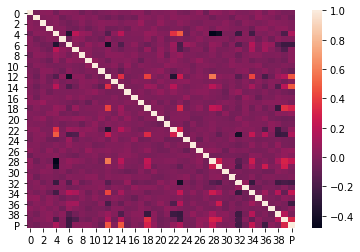

In [523]:
df_triggle_corr = pd.concat([pd.DataFrame(trainX),app_train_Y],axis=1)
corr = df_triggle_corr.corr()
sns.heatmap(corr)
plt.show()

#### 獵取較佳相關特徵

In [524]:
high_col = list(corr[(corr['P']> 0.1) | (corr['P']<-0.1)].index)
high_col.pop(-1)
high_col

[4, 6, 12, 14, 18, 23, 28, 32, 34, 36, 39]

In [525]:
trainX = df_triggle_corr[high_col]

## 拆分數聚集

In [526]:
x_train , x_test , y_train , y_test = train_test_split(trainX,app_train_Y,test_size=0.2,random_state=4)

In [527]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 11)
(200, 11)
(800, 1)
(200, 1)


## 初始訓練 : 使用DecisionTreeClassifier

In [528]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [529]:
y_pred = clf.predict(x_test)

In [530]:
metrics.accuracy_score(y_test,y_pred)

0.775

## 初始訓練 : 使用GradientBoostingClassifier

In [531]:
clf = GradientBoostingClassifier()
clf.fit(x_train,y_train)

c:\users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [532]:
y_pred = clf.predict(x_test)

In [533]:
metrics.accuracy_score(y_test,y_pred)

0.87

#### 搭配GridSearch

In [534]:
# 設定要訓練的超參數組合
learning_rate = [0.05,0.1,0.15]
max_depth = [1, 3, 5]
n_estimators = [100,200,300]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth,learning_rate=learning_rate)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   14.5s finished
c:\users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [535]:
# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.883750 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [536]:
# 使用最佳參數重新建立模型
clf_bestparam = GradientBoostingClassifier(max_depth=grid_result.best_params_['max_depth'],
                                           n_estimators=grid_result.best_params_['n_estimators'],
                                          learning_rate = grid_result.best_params_['learning_rate'])

# 訓練模型
clf_bestparam.fit(x_train, y_train)

# 預測測試集
y_pred = clf_bestparam.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

c:\users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.895


## 初始訓練 : 使用RandomForest

In [537]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

c:\users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [538]:
?RandomForestClassifier

In [539]:
y_pred = clf.predict(x_test)

In [540]:
metrics.accuracy_score(y_test,y_pred)

0.875

#### 搭配GridSearch

## 初始訓練 : 使用XGBoost

## 初始訓練 : 使用Voting

## 產出解答上傳Kaggle

In [508]:
df_test = pd.DataFrame(testX)[high_col]
df_test

,4,6,12,14,18,23,28,32,34,36,39
0,1.749736,-1.322071,3.359963,1.823865,0.302796,-2.829966,0.738353,-1.675606,-0.244388,0.517860,2.818387
1,0.915231,3.703187,-6.404201,-0.277077,-3.129533,-4.744641,-3.309266,-2.200519,0.179031,0.643610,-0.976265
2,1.699867,-1.384999,-1.660207,-2.055934,1.697615,-2.978056,-3.033888,1.467490,-3.542981,-1.652948,1.773784
3,-3.983468,4.136113,-2.988552,-2.031105,-3.750689,-1.539170,-0.384298,-0.131219,2.302069,-1.563090,-2.945329
4,-2.627405,4.954253,-4.037594,1.791508,-0.882400,-4.731511,-1.359054,-2.173227,0.450700,1.301359,0.039213
...,...,...,...,...,...,...,...,...,...,...,...
8995,2.258491,0.857187,-2.824686,-0.219668,2.552694,2.442445,0.432673,-0.732764,-1.151233,0.573013,1.457601
8996,3.606170,-1.889365,3.737825,1.436733,1.739011,5.515052,1.389579,-1.474198,1.964519,0.678023,1.104493
8997,8.918393,-3.361146,4.520659,-0.000129,2.799496,6.103361,-2.208242,0.182872,0.670161,-3.006949,-1.218561
8998,2.621641,0.312742,-5.635640,-2.359978,1.437120,0.871405,0.129962,-1.098508,-1.957241,3.777669,2.325271


In [509]:
y_pred = clf.predict(df_test)

In [510]:
np.arange(1,9000,1)

array([   1,    2,    3, ..., 8997, 8998, 8999])

In [511]:
pd.DataFrame(y_pred).set_index(np.arange(1,9001,1)).reset_index()

,index,0
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
8995,8996,0
8996,8997,1
8997,8998,1
8998,8999,0


In [512]:
pd.DataFrame(y_pred).set_index(np.arange(1,9001,1)).reset_index().rename(columns={'index':'Id',0:'Solution'}).to_csv("Data_Science_London.csv",index=False)